In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import tikzplotlib

figureheight='5cm'
figurewidth='14cm'

In [3]:
timeLabel = '$t$, time[seconds]'

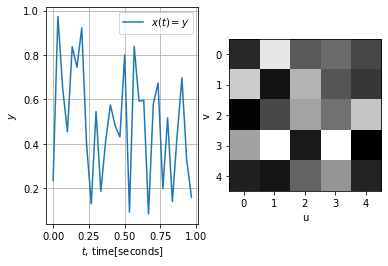

In [22]:
sr = 30
T = 1
N = sr*T
n = arange(N)
t = n/sr
f = 1
y = random.random(N)
subplot(121)
plot(t,y, label='$x(t)=y$')
grid(True)
xlabel(timeLabel)
ylabel('$y$')
legend()
# tikzplotlib.save("randSignal.tex", axis_height=figureheight,axis_width=figurewidth)

subplot(122)
y = random.random([5,5])
# plot(y)
imshow(y, cmap='gray')
xlabel('u')
ylabel('v')
# colorbar()
tikzplotlib.save("randSignal.tex", axis_height='5cm',axis_width='7cm')

# Sampling

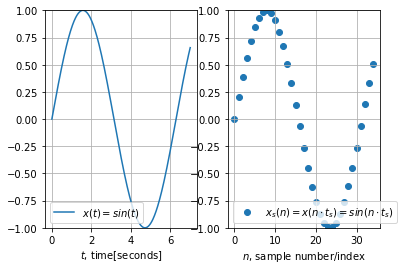

In [56]:
T = 7
srHigh = 50
Nhigh = srHigh*T
t = linspace(0,T,Nhigh)
xcont = sin(t)

subplot(121)
plot(t, xcont, label=r'$x(t) = sin(t)$')
ylim([0,1])
grid(True)
xlabel(timeLabel)
ylim([-1,1])
legend(loc=3)

subplot(122)
t_s = 0.2
N = round(T/t_s)
n = arange(N)
t_ds = n*t_s

index = (t_ds*srHigh).astype(int16)

xds = xcont[index]
scatter(n,xds,label=r'$x_s(n)=x(n\cdot t_s)=sin(n\cdot t_s)$')

legend(loc=3)
xlabel('$n$, sample number/index')
ylim([-1,1])
grid(True)

tikzplotlib.save("sampling.tex", axis_height='5cm',axis_width='8cm')

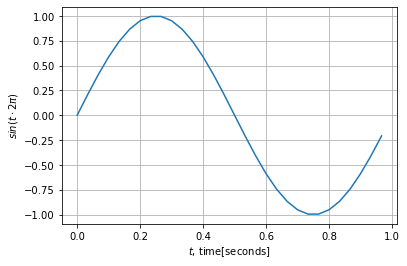

In [9]:
sr = 30
T = 1
N = sr*T
n = arange(N)
t = n/sr
f = 1
y = sin(2*pi*t*f)
plot(t,y)
grid(True)
xlabel(timeLabel)
ylabel('$sin(t \cdot 2 \pi)$')
tikzplotlib.save("sinPlot1.tex", axis_height=figureheight,axis_width=figurewidth)

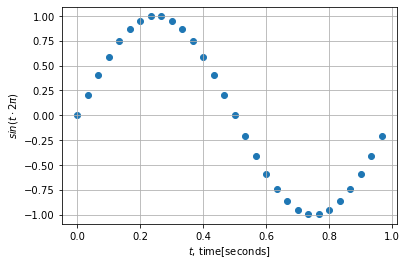

In [19]:
scatter(t,y)
grid(True)
xlabel(timeLabel)
ylabel('$sin(t \cdot 2 \pi)$')
tikzplotlib.save("sinPlotScatter.tex",axis_height=figureheight,axis_width=figurewidth)

C:\Users\hrtlacek\Anaconda3\envs\td1\lib\site-packages\ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


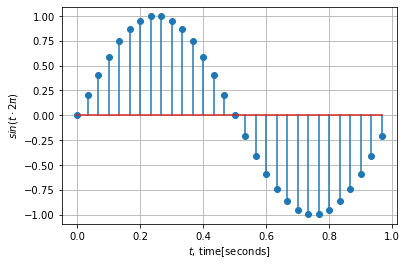

In [20]:
stem(t,y)
grid(True)
xlabel(timeLabel)
ylabel('$sin(t \cdot 2 \pi)$')
tikzplotlib.save("sinPlotStem.tex",axis_height=figureheight,axis_width=figurewidth)

In [7]:
# For plotting the original signal, we use an adequate sampling rate (fs_h =70Hz)
fs_h = 70. #sample rate
T = 1. #duration in seconds
N_h = int(T*fs_h) #number of samples
n_h = arange(N_h) #sample index array
t_h = n_h/fs_h #time index array

# For showing the effect of aliasing we use a low sampling rate (fs_l = 4Hz)
fs_l = 4. #sample rate
N_l = int(T*fs_l) #number of samples
n_l = arange(N_l) #sample index array
t_l = n_l/fs_l #time index array


In [8]:
def alias(f, sr):
  nyq = sr/2
  fout = f%nyq #get the aliased frequency
  fout*=(1+((floor(f/nyq))%2)*-2) #correct phase every second round
  return fout

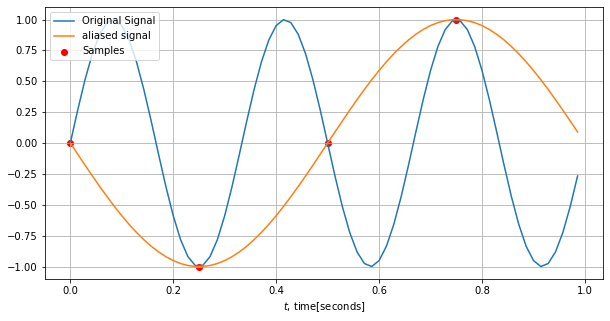

In [16]:
f = 3 #Hz, try different values here!
x1 = sin(2*pi*t_h*f)
sampled = sin(2*pi*t_l*f)
# Nyq_l = fs_l/2
aliasedFeq = alias(f,fs_l)
aliased = sin(2*pi*t_h*aliasedFeq)
figure(figsize=[10,5])
plot(t_h,x1, label='Original Signal')
scatter(t_l,sampled, label='Samples',c='r')
plot(t_h,aliased, label='aliased signal')
xlabel(timeLabel)
legend(loc=2)
grid(True)
tikzplotlib.save("aliasTime.tex", axis_height=figureheight,axis_width=figurewidth)

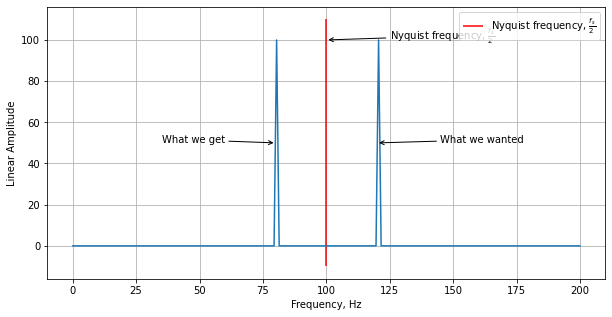

In [15]:
sr = 200
f = 120
T = 1
N = sr*T
n = arange(N)
t = n/sr
sig = sin(f*t*2*pi)

f_alias = sr/2 - abs(alias(f,sr))

freqAxis = linspace(0,sr,N)
spec1 = abs(fft.fft(sig))
figure(figsize=[10,5])
plot(freqAxis, spec1)
vlines(sr/2,0-10,max(spec1)*1.1,colors='r',label=r'Nyquist frequency, $\frac{f_s}{2}$')
xlabel('Frequency, Hz')
ylabel('Linear Amplitude')
legend()
annotate(r'Nyquist frequency, $\frac{f_s}{2}$',[sr/2,100],xytext=[sr/2+25,100],arrowprops=dict(arrowstyle="->"))
annotate(r'What we wanted',[f,50],xytext=[f+25,50],arrowprops=dict(arrowstyle="->"))
annotate(r'What we get',[f_alias,50],xytext=[f_alias-20,50],arrowprops=dict(arrowstyle="->"),ha='right')
grid()
tikzplotlib.save("aliasFreq.tex", axis_height=figureheight,axis_width=figurewidth)

# Mapping

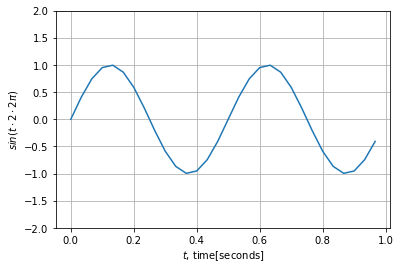

In [24]:
sr = 30
T = 1
N = sr*T
n = arange(N)
t = n/sr
f = 2
y = sin(2*pi*t*f)
plot(t,y)
grid(True)
xlabel(timeLabel)
ylabel(f'$sin(t \cdot {f} \cdot 2 \pi)$')
ylim([-2,2])
tikzplotlib.save("stdSine.tex", axis_height=figureheight,axis_width=figurewidth)

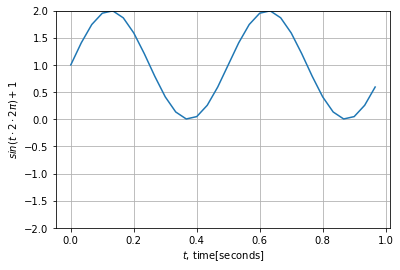

In [25]:
sr = 30
T = 1
N = sr*T
n = arange(N)
t = n/sr
f = 2
y = sin(2*pi*t*f) + 1
plot(t,y)
grid(True)
xlabel(timeLabel)
ylabel(f'$sin(t \cdot {f} \cdot 2 \pi) + 1$')
ylim([-2,2])
tikzplotlib.save("sinePlusOne.tex", axis_height=figureheight,axis_width=figurewidth)

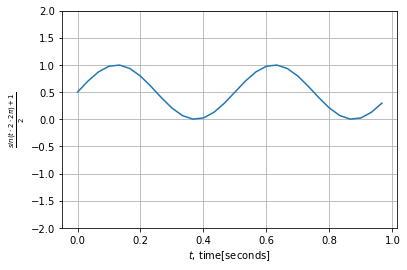

In [34]:
sr = 30
T = 1
N = sr*T
n = arange(N)
t = n/sr
f = 2
y = (sin(2*pi*t*f) + 1)/2.
plot(t,y)
grid(True)
xlabel(timeLabel)
ylabel(r'$\frac{sin(t \cdot 2 \cdot 2 \pi) + 1}{2}$')
ylim([-2,2])
tikzplotlib.save("sine01.tex", axis_height=figureheight,axis_width=figurewidth)

# DC-Offset

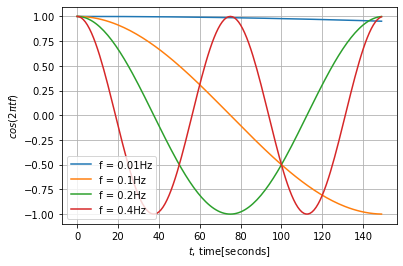

In [35]:
sr = 30
T = 5
N = sr*T
n = arange(N)
t = n/sr

freqs = [0.01, 0.1, 0.2, 0.4]
for f in freqs:
    x = cos(2*pi*t*f) 
    plot(x, label=f'f = {f}Hz')
legend()
ylabel('$cos(2 \pi t f)$')
xlabel(timeLabel)
grid(True)
tikzplotlib.save("dcOffsetViz.tex", axis_height=figureheight,axis_width=figurewidth)

# Unit Impulse

C:\Users\hrtlacek\Anaconda3\envs\td1\lib\site-packages\ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


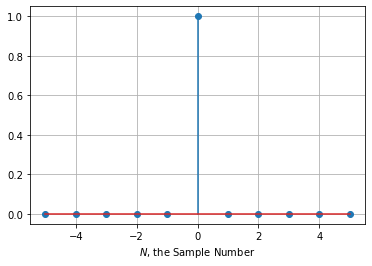

In [41]:
n = arange(-5, 6)
x = zeros_like(n)
x[5] = 1
stem(n,x)
xlabel('$N$, the Sample Number ')
grid(True)
tikzplotlib.save("unitImpulse.tex", axis_height=figureheight,axis_width=figurewidth)

# Message domain vs Signal Domain

In [44]:
from scipy import signal as sig

In [110]:
sr = 1000
T = 0.5
N = int(sr*T)
n = arange(N)
t = n/sr
cont = linspace(0,1,N)

In [156]:
numSamps = 6
index = (linspace(0,1,numSamps)*(N-1)).astype(int16)

In [157]:
index

array([  0,  99, 199, 299, 399, 499], dtype=int16)

In [158]:
ds = cont[index]

In [159]:
upsampled = zeros_like(cont)

for i in range(len(index)-1):
    upsampled[index[i]:index[i+1]] = cont[index[i]]

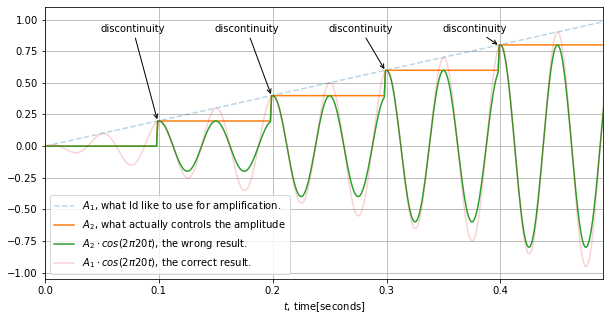

In [171]:
figure(figsize=[10,5])
f = 20
baseSig = cos(2*pi*f*t)
sig = baseSig * upsampled
sig2 = baseSig * cont
plot(t,cont,'--',alpha=0.3, label='$A_1$, what Id like to use for amplification.')
plot(t, upsampled, label = '$A_2$, what actually controls the amplitude')
plot(t, sig, label='$A_2 \cdot cos(2\pi 20 t)$, the wrong result.')
plot(t, sig2, alpha=0.2, label='$A_1 \cdot cos(2\pi 20 t)$, the correct result.')

for ind in index:
    if ind >1 and ind<499:
        xcoord = t[ind]
        ycoord = sig[ind]
        annotate(r'discontinuity',[xcoord,ycoord],xytext=[xcoord-0.05,0.9],arrowprops=dict(arrowstyle="->"))

xlim([0,0.49])
xlabel(timeLabel)
legend(loc=3)
grid(True)
tikzplotlib.save("ampWrongViz.tex", axis_height='10cm',axis_width='14.5cm')

In [47]:
N

15.0

In [37]:
n

array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4])